#**MODUL 7 : METODE *SHOOTING*** 
>Modul ini  memberikan gambaran penggunaan metode *shooting*
untuk menyelesaikan masalah syarat batas yang diperlakukan
sebagai masalah syarat awal. Dengan memahami bab ini
pengguna diharapkan memiliki kesadaran bahwa satu masalah
fisika tertentu dapat didekati dengan berbagai metode numerik
yang berbeda.

##7.1. Pendahuluan

Dalam bab ini disajikan beberapa alternatif penyelesaian persamaan Poisson yang
muncul oleh adanya muatan yang terdistribusi secara simetri bola. Tiga teknik yang ditinjau adalah metode matrik, integrasi langsung dan iterasi. Dalam metode matrik yang telah disajikan bab pembahasan sebelumnya, penyelesaian bentuk matrik tridiagonal yang terbentuk oleh masalah sarat batas dilakukan dengan metode eleminasi Gauss dengan memanfaatkan kenyataan bahwa sebagian besar unsur matrik bernilai nol (matrik jarang). Dengan cara ini cacah operasi yang semula berorde $N^{2}$ dapat dikurangi dalam orde $N$ sehingga matrik berorde besar dimungkinkan untuk diselesaikan. Dengan metode integrasi langsung maka masalah syarat batas diperlakukan sebagai masalah syarat awal sehingga nilai-nilai fungsi pada seluruh daerah dapat dibangkitkan berdasar dua nilai awal yang diberikan. Akhirnya dengan metode iterasi maka nilai-nilai fungsi diperoleh berdasar nilai-nilai coba dari fungsi tersebut sedemikian rupa sehingga pada langkah iterasi tertentu nilai-nilai fungsi tersebut diharapkan dapat konvergen pada nilai tertentu.

##7.2. Dasar Teori
Oleh adanya distribusi muatan yang memiliki rapat muatan $\rho(r)$ maka medan listrik ***E*** pada setiap titik dalam ruang diberikan oleh hukum Gauss

\begin{equation}
\oint_{S}\mathbf{E}\cdot d\textbf{S}=4\pi\int_{V}\rho dV \quad \textrm{atau}\quad \nabla\cdot\textbf{E}=4\pi\rho.
\tag{7.1}
\end{equation}

Mengingat $\textbf{E}=-\nabla V$ maka persamaan (7.1) dapat dinyatakan pula sebagai apa yang disebut persamaan Poisson yaitu
\begin{equation}
\nabla^{2}\textbf{E}=-4\pi\rho.
\tag{7.2}
\end{equation}
Apabila dimiliki rapat muatan yang tergantung pada jarak radial saja yaitu $\rho(r)=\frac{1}{4\pi}e^{-r}$ maka, oleh adanya simetri bola, persamaan Poisson menjadi
\begin{equation}
\frac{1}{r^{2}}\frac{d}{dr}\Bigg(r^{2}\frac{dV}{dr}\Bigg)=-e^{-r}.
\tag{7.3}
\end{equation}

Karena $\rho$ tidak singular di $r = 0$ maka $V(0)$ bernilai berhingga dan memiliki perilaku seperti potensial Coulomb di $r\rightarrow\infty$ yaitu $V(r\rightarrow\infty) = 1/r$.

Secara analitik masalah tersebut dapat dipecahkan dengan eksak melalui hukum
Gauss seperti yang diberikan oleh persamaan (7.1). Oleh adanya simetri bola maka dapat diambil permukaan Gauss dalam bentuk bola dengan jari-jari *r*.Dengan pengambilan bentuk tersebut maka medan listrik pada permukaan Gauss akan bernilai sama dan arahnya tegaklurus pada permukaan. Ini berarti pada setiap titik pada permukaan Gauss, medan listrik akan searah dengan unsur vektor permukaan $dS$. Oleh karena itu didapatkan
\begin{equation}
\oint_{S}E dS=E\int_{S}dS=E 4\pi r^{2}=4\pi\int^{r}_{0}e^{-r'}4\pi r'^{2}dr'.
\tag{7.4}
\end{equation}
Mudah ditunjukkan baik menggunakan kalkulus maupun dengan bantuan paket aljabar
simbol seperti MuPAD, MAPLE atau Mathematica bahwa ungkapan di atas
akan menghasilkan
\begin{equation}
E(r)=\frac{2}{r^{2}}-2e^{-r}\Big(\frac{1}{2}+\frac{1}{r}+\frac{1}{r^{2}}\Big).
\tag{7.5}
\end{equation}

Akhirnya dengan menerapkan $E = -\nabla V$ didapatkan potential listrik pada jarak $\emph{r}$ dari pusat koordinat yaitu
\begin{equation}
V(r)=\frac{2}{r}-\frac{(2+r)}{r}e^{-r}.
\tag{7.6}
\end{equation}

Dalam kebanyakan kasus, penyelesaian persamaan Poisson secara analitik seperti
gambaran di atas tidak selalu dapat dilakukan. Hal ini dapat terjadi karena persamaan diferensial yang terbentuk mungkin terlalu sulit atau justru syarat batasnya sendiri berbentuk tidak sederhana. Dalam posisi seperti inilah terpaksa dicari alternatif metode penyelesaian lain. Salah satu alternatif selain metode analitik adalah secara komputasi numerik. Tulisan ini mencoba memberikan gambaran bagaimana masalah mencari distribusi potensial dalam ruang akibat adanya rapat muatan $\rho(r) = \frac{1}{4\pi}e^{-r}$ dapat diselesaikan secara numerik. Dengan demikian peranan penyelesaian analitik
seperti diberikan oleh persamaan (7.6) adalah selain sebagai rujukan untuk mengetahui ketelitian hasil komputasi juga sebagai media untuk membangkitkan ketrampilan tentang parameter-parameter numerik apakah yang perlu dikaji dan diperhatikan agar diperoleh hasil yang sesuai.

##7.3. Metode Komputasi

Mengambil bentuk $V(r) = \phi(r)/r$ maka persamaan (7.3) dapat dinyatakan dalam bentuk
\begin{equation}
\frac{d^{2}\phi}{dr^{2}}=-re^{-r}.
\tag{7.7}
\end{equation}

Dari sudut komputasi, bentuk persamaan (7.7) lebih menguntungkan dibanding persamaan (7.3) karena tidak ada campuran pada orde diferensial sehingga lebih memudahkandalam pengubahannya ke bentuk beda berhingga. Dengan penggantian fungsi tersebut maka syarat batas yang harus dipenuhi adalah bahwa $\phi(r) = 0$ saat $r = 0$ dan $\phi(r) = 2$ saat $r\rightarrow\infty$. Mengganti ke bentuk ungkapan beda berhingganya, maka persamaan (7.7) dapat dinyatakan ke bentuk

\begin{equation}
\phi_{i-1}-2\phi_{i}+\phi_{i+1}=-h^{2}r_{i}e^{-r_{i}},
\tag{7.8}
\end{equation}

dimana $r_{i} = ih$ dan $\phi_{i} = \phi(r_{i})$. Dengan notasi tersebut maka ungkapan bagi syarat batas dapat dinyatakan sebagai $\phi_{0} = 0$ dan $\phi_{N+1} = 2$ dimana \emph{N} adalah bilangan bulat positip yang diambil bernilai cukup besar sedemikian hingga $r_{N+1}\rightarrow\infty$.
Berbagai metode dapat dilakukan untuk menyelesaikan persamaan (7.8) secara numerik. Disini akan diambil hanya tiga metode untuk memberikan gambaran nyata bagaimana persoalan tersebut dapat diselesaikan.

###7.3.1. Metode Integrasi Langsung
Dengan memperlakukan persamaan (7.8) menjadi masalah syarat awal maka diperlukan satu nilai tambahan pada $r = 0$ atau $r\rightarrow\infty$ agar semua nilai $\{\phi_{i}; i = 1, \cdots,N\}$ dapat dihitung. Dalam banyak kasus biasanya ada informasi fisis yang dapat dideduksi sehingga tambahan satu nilai pada salah satu batas tersebut dapat diberikan. Namun jika tidak ada satupun cara untuk memperolehnya, tambahan satu nilai tersebut dapat diberikan secara sebarang sedemikian hingga ketika dilakukan proses integrasi akan diperoleh nilai yang sesuai pada batas yang lain. Tehnik semacam ini biasa disebut metode *shooting* karena mirip seperti orang yang akan menembak suatu sasaran pada jarak jauh, yang salah satu usahanya yaitu dengan mengatur sudut tembak (analog dengan nilai slope dari fungsi pada titik awal).

Untuk masalah yang dihadapi disini, nilai slope dari $\phi$ secara intuisi fisis lebih mudah disimpulkan pada $r\rightarrow\infty$ dibanding pada $r = 0$. Pada jarak tak berhingga tersebut, rapat muatan praktis sama dengan nol sehingga tidak ada sokongan muatan lagi. Akibatnya $\frac{d\phi}{dr} = 0$ atau $\phi_{N} = \phi_{N+1}$. Dengan tambahan nilai awal $\phi_
{N+1} = 2$ maka persamaan (7.8) dapat dinyatakan dalam bentuk rekursif berikut

\begin{equation}
\phi_{i+1}=2\phi_{i}-\phi_{i-1}-h^{2}r_{i}e^{-r_{i}};\qquad  i=1=N,\cdots,1.
\tag{7.9}
\end{equation}

Program komputer dalam bahasa Python yang menerapkan metode *shooting*
tersebut tertulis seperti di bawah.


In [ ]:
from numpy import *
import matplotlib.pyplot as plt
#print '###############################################'
#print ' Program untuk mencari distribusi potensial    '
#print ' melalui persamaan Poisson. Penyelesaian       '
#print ' dengan integrasi langsung dari algoritma      '
#print ' Numerov (Koonin, Computational Physics hal 51)'
#print '###############################################'

#----Memasukkan nilai interval langkah h dan jumlah titik  data ----------------------------------------------
h=eval(input('Ukuran Langkah?'))
n=eval(input('Cacah Titik?'))
kons=h**2/12.0      #tetapan pengali
ri=[0]*(n+2)        #Deklarasi list/array untuk menyimpan nilai posisi
phi=[0]*(n+2)       #Deklarasi list/array untuk menyimpan nilai potensial
phi_eksak=[0]*(n+2) #Deklarasi list/arrat untuk menyimpan nilai potensial hasil 
                    #..perhitungan eksak/analitik.
#-------------------------------------------------------------------------------------------------------------
# nilai syarat batas di tak berhingga dan satu nilai
# didekatnya yang diambil secara intuisi fisis yaitu
# slope dari potensial di posisi tak berhingga adalah nol
phi[n+1]=2
phi[n]=2
#-------------------------------------------------------------------------------------------------------------
r=(n+1)*h        
# nilai source pada tiap titik
s3=-r*exp(-r)

r=n*h
s2=-r*exp(-r)

#----Metode Numerov: integrasi langsung dan perbandingan dengan nilai eksaknya


#for k in range(n):
 #   ri[k]=0+k*h
 #   phi_eksak[k]=2-(ri[k]+2)*exp(-ri[k])

k=n

ri[k+1]=(k+1)*h
phi_eksak[k+1]=2-(ri[k+1]+2)*exp(-ri[k+1])

while (k>0):
    r=(k-1)*h
    s1=-r*exp(-r)
    phi[k-1]=2*phi[k]-phi[k+1]+kons*(s3+10*s2+s1)
    s3=s2
    s2=s1

    ri[k]=k*h
    phi_eksak[k]=2-(ri[k]+2)*exp(-ri[k])
    k=k-1

#-------------------------------------------------------------------------------
#----Menampilkan hasil dalam bentuk kolom 
#-------------------------------------------------------------------------------
print("r_i    phi_i   phi_i_eksak")
for i in range(n+1):
  print("%2.3f  %4.3f   %4.3f"%(ri[i],phi[i],phi_eksak[i])) 
  



Ukuran Langkah?0.5
Cacah Titik?40
r_i    phi_i   phi_i_eksak
0.000  0.001   0.000
0.500  0.484   0.484
1.000  0.896   0.896
1.500  1.219   1.219
2.000  1.459   1.459
2.500  1.631   1.631
3.000  1.751   1.751
3.500  1.834   1.834
4.000  1.890   1.890
4.500  1.928   1.928
5.000  1.953   1.953
5.500  1.969   1.969
6.000  1.980   1.980
6.500  1.987   1.987
7.000  1.992   1.992
7.500  1.995   1.995
8.000  1.997   1.997
8.500  1.998   1.998
9.000  1.999   1.999
9.500  1.999   1.999
10.000  1.999   1.999
10.500  2.000   2.000
11.000  2.000   2.000
11.500  2.000   2.000
12.000  2.000   2.000
12.500  2.000   2.000
13.000  2.000   2.000
13.500  2.000   2.000
14.000  2.000   2.000
14.500  2.000   2.000
15.000  2.000   2.000
15.500  2.000   2.000
16.000  2.000   2.000
16.500  2.000   2.000
17.000  2.000   2.000
17.500  2.000   2.000
18.000  2.000   2.000
18.500  2.000   2.000
19.000  2.000   2.000
19.500  2.000   2.000
20.000  2.000   2.000


Berikut ini adalah perintah untuk menampilkan hasil dalam plot grafik untuk nilai masukan interval *h* dan jumlah titik data *N* tertentu. Nilai masukan yang lain akan memberikan hasil yang pada umumnya mirip dengan hasil pada metode matrik di atas. Artinya, jika *h* tidak cukup halus atau *N* tidak cukup besar maka hasil komputasi akan mengalami penyimpangan dibanding hasil eksak.

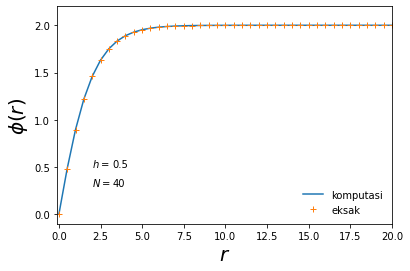

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

plt.plot(ri,phi,'-',label='komputasi')
plt.plot(ri,phi_eksak,'+',label='eksak')
plt.legend(loc=0,frameon=0)
plt.text(2,0.5,r'$h= $')
plt.text(3.2,0.5,h)
plt.text(2,0.3,r'$N= $')
plt.text(3.2,0.3,n)
plt.axis([-0.1,20,-0.1,2.2])
plt.xlabel('$r$',fontsize=20)
plt.ylabel(r'$\phi(r)$',fontsize=20)
plt.show()


##8.3.2 Metode Iterasi
Dalam metode ini, persamaan (7.8) diusahakan menjadi bentuk yang memungkinkan nilai $\phi_{i}$ pada satu tahap iterasi tertentu dapat dihitung berdasar nilai $\phi_{i}$ pada iterasi sebelumnya. Nilai-nilai $\{\phi_{i}; i = 1; \cdots,N\}$  pada awal iterasi dilakukan secara coba-coba atau berdasar nilai-nilai yang sudah diperoleh dari metode pendekatan yang ada. Untuk alasan tersebut maka persamaan (7.8) diubah ke bentuk

\begin{equation}
\phi^{(k)}_{i}=\Big(\phi^{(k-1)}_{i-1}+\phi^{(k+1)}_{i+1}+r_{i}e^{-r_{i}}\Big)/2.
\tag{7.10}
\end{equation}

Lambang $\phi^{(k)}_{i}$ berarti nilai $\phi_{i}$ pada langkah iterasi ke *k*.
Penyajian metode tersebut ke dalam program komputer bahasa *Python* dapat dilihat seperti di bawah.


In [ ]:
from numpy import *
import matplotlib.pyplot as plt

#print '###############################################'
#print ' Program untuk mencari distribusi potensial    '
#print ' melalui persamaan Poisson. Penyelesaian       '
#print ' dengan integrasi Gauss-Seidel
#print '###############################################'

#---------------Mendefinisikan fungsi eksponen untuk menghitung phi eksak
def fs(r):
    fs=r*exp(-r)
    return fs
#----------------------------------------------------------------------------

h=eval(input('Ukuran Langkah?'))
n=eval(input('Cacah Titik?'))
kons=h**2/12.0      #tetapan pengali
ri=[0]*(n+1)        #Deklarasi list/array untuk menyimpan nilai posisi
phi=[0]*(n+1)       #Deklarasi list/array untuk menyimpan nilai potensial
phi_eksak=[0]*(n+1) ##Deklarasi list/arrat untuk menyimpan nilai potensial hasil 
                    #..perhitungan eksak/analitik.

phi[0]=0   #nilai syarat batas potensial di r=0
phi[n]=2   #nilai syarat batas potensial di r=tak berhingga

# masukan nilai coba phi
phi_i=1.0
for i in range(1,(n-1)):
    phi[i]=phi_i

# mulai iterasi
i=1
niter=200 #cacah maksimum iterasi
while (i<niter):
    tol=0.0000000001
    #print ('Iterasi ke',i)

    for j in range(1,n):
        r=j*h
        ri[j]=r
        phi_iter=phi[j]
        #phi[j]=(phi[j-1]+phi[j+1]+ri[j]*exp(-ri[j])*h**2)/2
        phi[j]=(phi[j-1]+phi[j+1]+fs(r)*h**2)/2

        beda=abs((phi[j]-phi_iter)/phi[j])
        if (beda>tol):
            tol=beda
            #print (tol)
    i=i+1
    if (tol<0.0001):
        #print ('konvergensi telah dicapai')
        break
for k in range(n):
    r=k*h
    ri[k]=r
    phi_eksak[k]=2-(ri[k]+2)*exp(-ri[k])

    ri[n]=(n)*h
    phi_eksak[n]=2-(ri[n]+2)*exp(-ri[n])

    #break
#-------------------------------------------------------------------------------
#----Menampilkan hasil dalam bentuk kolom 
#-------------------------------------------------------------------------------
print("r_i    phi_i   phi_i_eksak")
for i in range(n+1):
  print("%2.3f  %4.3f   %4.3f"%(ri[i],phi[i],phi_eksak[i]))

Ukuran Langkah?0.5
Cacah Titik?30
r_i    phi_i   phi_i_eksak
0.000  0.000   0.000
0.500  0.474   0.484
1.000  0.873   0.896
1.500  1.180   1.219
2.000  1.404   1.459
2.500  1.562   1.631
3.000  1.669   1.751
3.500  1.739   1.834
4.000  1.785   1.890
4.500  1.813   1.928
5.000  1.831   1.953
5.500  1.841   1.969
6.000  1.847   1.980
6.500  1.851   1.987
7.000  1.854   1.992
7.500  1.857   1.995
8.000  1.860   1.997
8.500  1.864   1.998
9.000  1.869   1.999
9.500  1.876   1.999
10.000  1.883   1.999
10.500  1.892   2.000
11.000  1.901   2.000
11.500  1.911   2.000
12.000  1.923   2.000
12.500  1.935   2.000
13.000  1.947   2.000
13.500  1.960   2.000
14.000  1.973   2.000
14.500  1.987   2.000
15.000  2.000   2.000


Berikut ini adalah perintah *Python* untuk menghasilkan plot hasil perhitungan dengan mengambil syarat batas $\phi_{0}=0, \phi_{N}=2, h = 0.5, N = 30$ dan nilai coba $\{\phi^{0}_{i}=1; i = 1,...,N-1\}$ diperoleh hasil seperti terlihat pada gambar plot dibawah. Nampak pada gambar ini adanya penyimpangan antara hasil komputasi dan hasil eksak.

Mengingat ciri dari metode iterasi selain secara algoritma sederhana namun sangat sensitif terhadap nilai coba, maka hasil tersebut dapat diperbaiki sebagai contoh dengan mengambil nilai coba $\{\phi^{0}_{i}=1.95; i = 1,...,N-1\}$. 


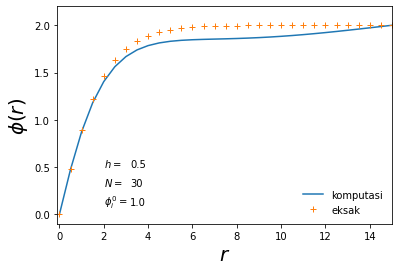

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

plt.plot(ri,phi,'-',label='komputasi')
plt.plot(ri,phi_eksak,'+',label='eksak')
plt.legend(loc=0,frameon=0)
plt.text(2,0.5,r'$h= $')
plt.text(3.2,0.5,h)
plt.text(2,0.3,r'$N= $')
plt.text(3.2,0.3,n)
plt.text(2,0.1,r'$\phi^{0}_{i}= $')
plt.text(3.2,0.1,phi_i)
plt.axis([-0.1,15,-0.1,2.2])
plt.xlabel('$r$',fontsize=20)
plt.ylabel(r'$\phi(r)$',fontsize=20)
plt.show()

##8.4. Kesimpulan
Dari semua uraian di atas telah ditunjukkan bagaimana metode komputasi dapat digunakan
sebagai alternatif metode penyelesaian berbagai masalah fisika selain menggunakan
cara fisika teori dan fisika eksperimen. Penerapan yang nyata dari fisika
komputasi tentunya bukan pada masalah sederhana seperti di atas, namun pada
masalah dimana fisika teori dan fisika eksperimen sangat sulit atau tidak mungkin untuk menyelesaikannya.